In [1]:
# Importing libraries

import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras import layers
import numpy as np
import math

In [2]:
# Making X & Y

def tabe(x):
  return 5*x**3 + 10*x -32

X = np.arange(-3,3, 0.001)
Y = tabe(X)


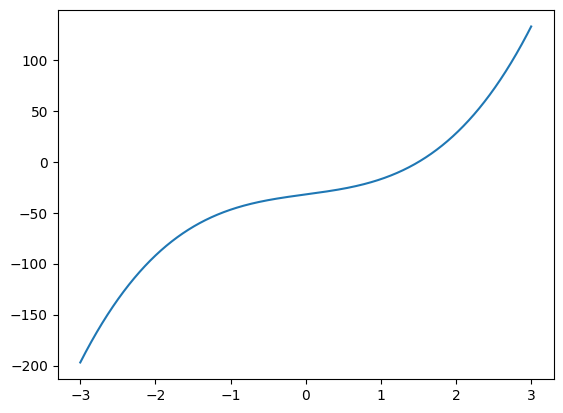

In [3]:
# Ploting X & Y

plt.plot(X,Y)

In [4]:
# Huber loss function
import tensorflow as tf

def huber(y_true, y_pred):
    delta = 0.00025
    error = y_true - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)

    return tf.where(condition, squared_loss, linear_loss)



In [5]:
# Check the length of the datas

len(X)

6000

In [6]:
# Spliting datas to train & test

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=1/6)

print('train size : ', len(x_train))
print('test size : ', len(x_test))

train size :  5000
test size :  1000


In [14]:
# Making the model

model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

model.compile(loss = huber, optimizer = 'adam')

In [15]:
# Model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Fitting the model

model.fit(x_test, y_test, batch_size=32, epochs=500, verbose=1)

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 6/500
32/32 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 7/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 11/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 12/500
32/32 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 13/500
32/32 [=================

32/32 [==============================] - 0s 1ms/step


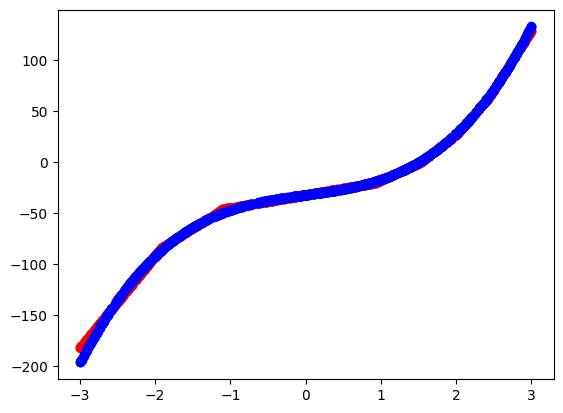

In [22]:
plt.plot(x_test, model.predict(x_test), 'ro')
plt.plot(x_test, y_test, 'bo')
plt.show()